<center><font size=6> Bank Churn Prediction </font></center>

| Project Submission| Date |
| --- | --- |
| Rob Barker | September 13, 2024 |
| Filename | RobBarker_NN_BankChurn_FC.html/ipynb | 
| Course | Neural Networks |

---
---

# Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

---
---
# Setup Environment

## Development Environment
* Local development with Visual Studio Code.
* Jupyter Notebook and Python 3.11.7 with Anaconda3. 
* Google Colab/Drive not used.
* Generated HTML using the jupyter cli

   ```jupyter nbconvert --to html RobBarker_NN_BankChurn_FC.html.ipynb```

* Added --- (markdown) lines for easier readability for myself. 

## Formatting Notes
* Moved helper functions into separate section.
* Added line separators for readability.

## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
%pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user
%pip install tabulate==0.9.3 -q --user

Note: you may need to restart the kernel to use updated packages.


In [181]:
# Libraries to help with reading and manipulating data.
import numpy as np
import pandas as pd

# Nicely display all the return columns of the dataframe. 
from tabulate import tabulate

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import Recall

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,accuracy_score, precision_score, recall_score, f1_score
import random

# To suppress warnings.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## Loading the dataset

In [3]:
# Load dataset.
bankchurn_df_org = pd.read_csv("/Users/barkz/Desktop/GL Projects/Bank-Churn-Prediction/bank-1.csv")
bankchurn_df = bankchurn_df_org.copy()

---
---
# Data Overview

This section will include:
* Data Analysis & Observations
    1. Top 5 rows
    2. Bottom 5 rows
    3. Shape
    4. Datatypes
    5. Duplicates
    6. Missing values
    7. Duplicates
    8. Statistical summary
    9. Categorical column summary
    10. ...

In [4]:
# Check the first few rows of the original dataset.
bankchurn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Retrieve first few rows of the copied dataset.
bankchurn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Retrieve last few rows of the copied dataset.
bankchurn_df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
# Retrieve number of rows and columns using the shape attribute of the DataFrame.
rows, columns = bankchurn_df.shape

# Print the number of rows and columns from the dataset. Output is formatted into thousands. 
# There are only 9 columns but for consistency, the output includes (,) format.
print(f'Number of Rows: {rows:,}')
print(f'Number of Columns: {columns:,}')

Number of Rows: 10,000
Number of Columns: 14


**Observations**
* There are 10,000 rows and 14 columns in the dataset.

In [8]:
# Get dataset information.
bankchurn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observations**
* There following datatypes are observed.
  * There are 2 float64
  * There are 9 int64
  * There are 3 object

In [9]:
# Check for missing values in the dataset, Null.
null_values = bankchurn_df.isnull().sum()

# Check for missing values in the dataset, NaN.
nan_values = bankchurn_df.isna().sum()

# Output if there are any missing data points in the dataset.
if null_values.sum() or nan_values.sum() > 0:
    print("There are missing data points in the dataset.")
    
    # List columns with missing values.
    null_columns = null_values[null_values > 0]
    nan_columns = nan_values[nan_values > 0]

    print("Columns with null values:")
    print(null_columns)

    print("Columns with NaN values:")
    print(nan_columns)
else:
    print("There are no Nan or null data points in the dataset.")


There are no Nan or null data points in the dataset.


**Observations**
* There are no NaN or null values in the dataset.

In [11]:
# Check for unique values in the dataset.
bankchurn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [17]:
# Check for duplicate values.
bankchurn_df.duplicated().sum()

0

**Observation**
* There are no duplicate values.

In [12]:
# Set the display format for float64 to avoid exponential notation.
pd.options.display.float_format = '{:.0f}'.format

# Statistical summary of the dataset.
bankchurn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000,5000,2887,1,2501,5000,7500,10000
CustomerId,10000,15690941,71936,15565701,15628528,15690738,15753234,15815690
CreditScore,10000,651,97,350,584,652,718,850
Age,10000,39,10,18,32,37,44,92
Tenure,10000,5,3,0,3,5,7,10
Balance,10000,76486,62397,0,0,97199,127644,250898
NumOfProducts,10000,2,1,1,1,1,2,4
HasCrCard,10000,1,0,0,0,1,1,1
IsActiveMember,10000,1,0,0,0,1,1,1
EstimatedSalary,10000,100090,57510,12,51002,100194,149388,199992


**Observation**

| Column Name | Datatype | Observation |
| --- | --- | --- |
| RowNumber | int64 | Unique client identifier. Can be dropped from data set. |
| CustomerId | int64 | Unique client identifier. Can be dropped from data set. |
| Surname | object | Unique client identifier. Can be dropped from data set. |
| CreditScore | int64 | Ranges between 350 - 850 with average of 651. |
| Geography | object | Categorical data needs to be encoded. |
| Gender | object | Categorical data needs to be encoded. | 
| Age | int64 | Customers range in age from 18 - 92 with an average of 39 years of age. |
| Tenure | int64 | Maximum tenure is 10 years with an average job length of 5 years. There are some customers with no job tenure. |
| Balance | float64 | Balance is a very large distribution of $0.00 - $250,898.00. Average balance is $76,486.00. |
| NumOfProducts | int64 | Maximum number of products held by customers is 4 with all customers having at least 1 product and on average have 2. |
| HasCrCard | int64 | Categorical value. |
| IsActiveMember | int64 | Categorical value. |
| EstimatedSalary | float64 | Average salary is $100,090.00 with a maximum of $199,992.00. |
| Exited | int64 | Target value per business objective; determine whether they will leave or not in the next 6 months. |

In [15]:
# Get summary of the categorical columns.
bankchurn_df.describe(include=["object"]).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [16]:
# Determine how many customers have credit cards.
table = [[value, count] for value, count in bankchurn_df["HasCrCard"].value_counts().items()]

# Print table using tabulate.
print("Has Credit Card:")
print(tabulate(table, headers=["Value", "Count"], tablefmt="grid"))

Has Credit Card:
+---------+---------+
|   Value |   Count |
+=========+=========+
|       1 |    7055 |
+---------+---------+
|       0 |    2945 |
+---------+---------+


In [17]:
# Determine how many customers as active (IsActiveMember).
table = [[value, count] for value, count in bankchurn_df["IsActiveMember"].value_counts().items()]

# Print table using tabulate.
print("Is Active Member:")
print(tabulate(table, headers=["Value", "Count"], tablefmt="grid"))

Is Active Member:
+---------+---------+
|   Value |   Count |
+=========+=========+
|       1 |    5151 |
+---------+---------+
|       0 |    4849 |
+---------+---------+


In [56]:
# Loop through the categorical columns and print unique values.
for n in bankchurn_df.describe(include=["object"]).columns:

    # Suranme column has too many unique values, so we will print the top 5.
    if n == 'Surname':
        # Get the top 5 surnames and their counts.
        top_10_surnames = bankchurn_df["Surname"].value_counts().head(5)
        
        # Create list of lists for the table
        table = [[value, count] for value, count in top_10_surnames.items()]
        
        # Print table using tabulate
        print("Top 10 unique values in Surname are:")
        print(tabulate(table, headers=["Value", "Count"], tablefmt="grid"))
        print("\n")
        continue  # Skip the rest of the loop for 'surname' column

    print(f"Unique values in {n} are :")
    
    # Create list of lists for the table.
    table = [[value, count] for value, count in bankchurn_df[n].value_counts().items()]
    
    # Print table using tabulate.
    print(tabulate(table, headers=["Value", "Count"], tablefmt="grid"))
    print("\n")

Top 10 unique values in Surname are:
+---------+---------+
| Value   |   Count |
+=========+=========+
| Smith   |      32 |
+---------+---------+
| Scott   |      29 |
+---------+---------+
| Martin  |      29 |
+---------+---------+
| Walker  |      28 |
+---------+---------+
| Brown   |      26 |
+---------+---------+


Unique values in Geography are :
+---------+---------+
| Value   |   Count |
+=========+=========+
| France  |    5014 |
+---------+---------+
| Germany |    2509 |
+---------+---------+
| Spain   |    2477 |
+---------+---------+


Unique values in Gender are :
+---------+---------+
| Value   |   Count |
+=========+=========+
| Male    |    5457 |
+---------+---------+
| Female  |    4543 |
+---------+---------+




**Observations:**
* 20% of customers have exited within 6 months.
* Male (55%) and females (45%) customers are almost a 50/50 split.
* Top Surname is Smith with 32 customers. 
* Half of the customers live in France (50%).
* Most customers are married.
* Most customers lie in the income group of less than $40k
* Most customers have a blue card.
* The data is imbalanced.
* Active members is approximately a 50/50 split (52% active / 48% not active).

In [18]:
# Check the shape of the dataset before performing drop operation.
print("Pre-drop operation:")
print(f"There are {bankchurn_df.shape[0]} rows and {bankchurn_df.shape[1]} columns.")  

bankchurn_df=bankchurn_df.drop(["RowNumber","CustomerId","Surname"], axis=1)
bankchurn_df.head()

# Check the shape of the dataset.
print("\nPost-drop operation:")
print(f"There are {bankchurn_df.shape[0]} rows and {bankchurn_df.shape[1]} columns.")

Pre-drop operation:
There are 10000 rows and 14 columns.

Post-drop operation:
There are 10000 rows and 11 columns.


---
---
# Exploratory Data Analysis

## Helper Functions

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [86]:
# Function to plot stacked bar chart with percentages.
#
# NOTE: Added whole percentages to chart output.
#
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart with percentages.

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    
    # Print the category counts.
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    
    # Create the normalized crosstab for the plot.
    tab = pd.crosstab(data[predictor], data[target], normalize="index") * 100
    tab = tab.sort_values(by=sorter, ascending=False)
    
    # Plot the stacked bar chart.
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    
    # Add percentages on the bars.
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white')
    
    # Add legend with custom labels.
    handles, labels = ax.get_legend_handles_labels()
    custom_labels = ["0 = Did Not Leave", "1 = Did Leave"]
    plt.legend(handles, custom_labels, title=target, loc="upper left", bbox_to_anchor=(1, 1))
    
    
    plt.show()

In [26]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate Analysis

#### Observations on CreditScore

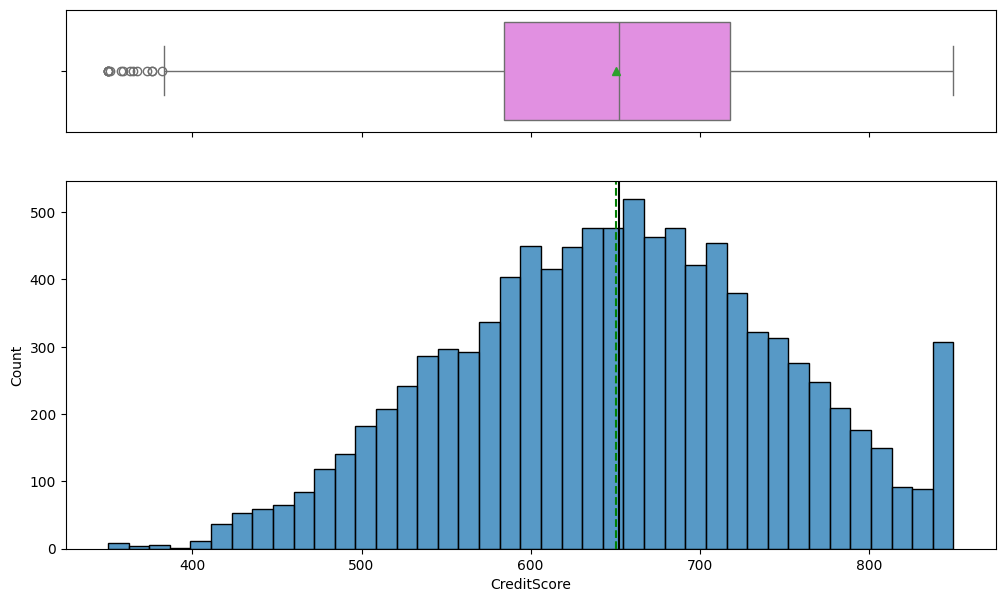

In [35]:
histogram_boxplot(bankchurn_df, "CreditScore")

**Observations:**
* Credit score shows a normal distributions.
* Average credit score is 650.
* Outliers to the left that should very low credit scores.

#### Observations on Age

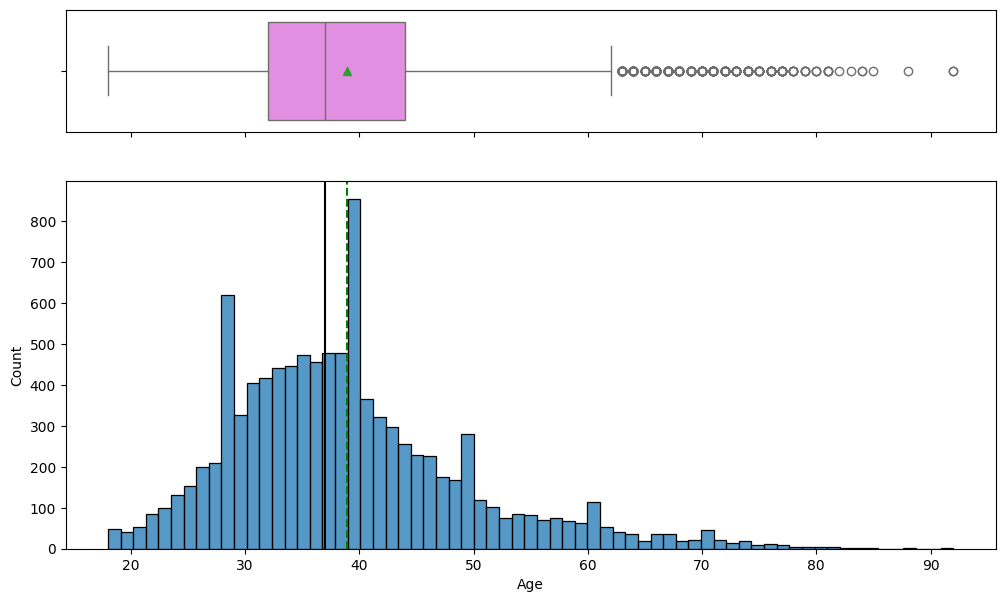

In [29]:
histogram_boxplot(bankchurn_df, "Age")

**Observations:**
* Age shows a slightly right-skewed distribution with outliers.
* There is a large distribution of ages from 18 - 92.
* The average age is 39.

#### Observations on Balance

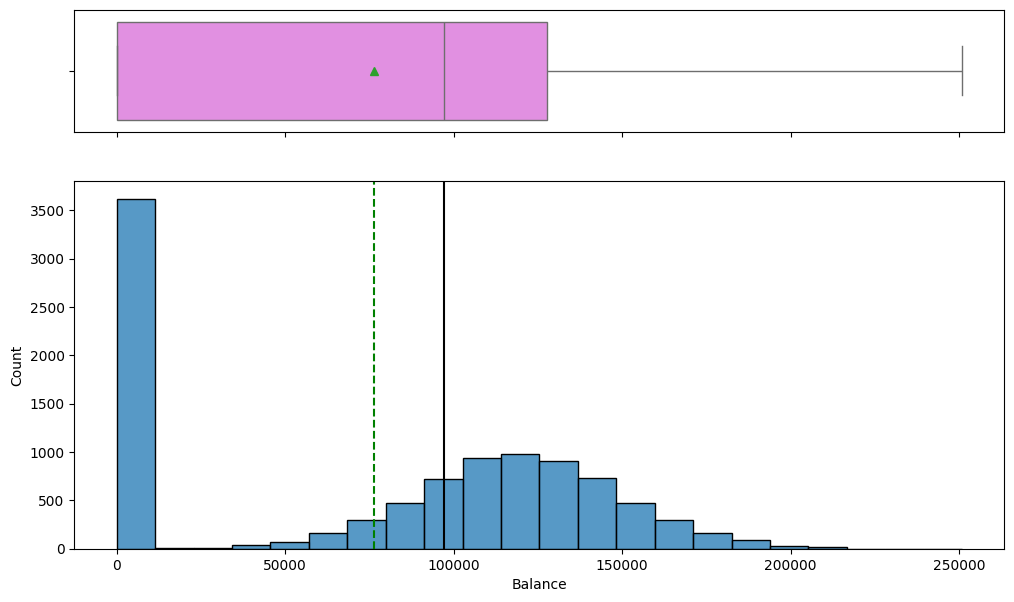

In [30]:
histogram_boxplot(bankchurn_df, "Balance")

**Observations:**
* The third quartile shows a $127,644.00 balance which indicates that 75% of customers have a balance lower than $128,000.00.
* There is a high number of customers with a balance of $0.00 or close to $0.00.

#### Observations on Estimated Salary

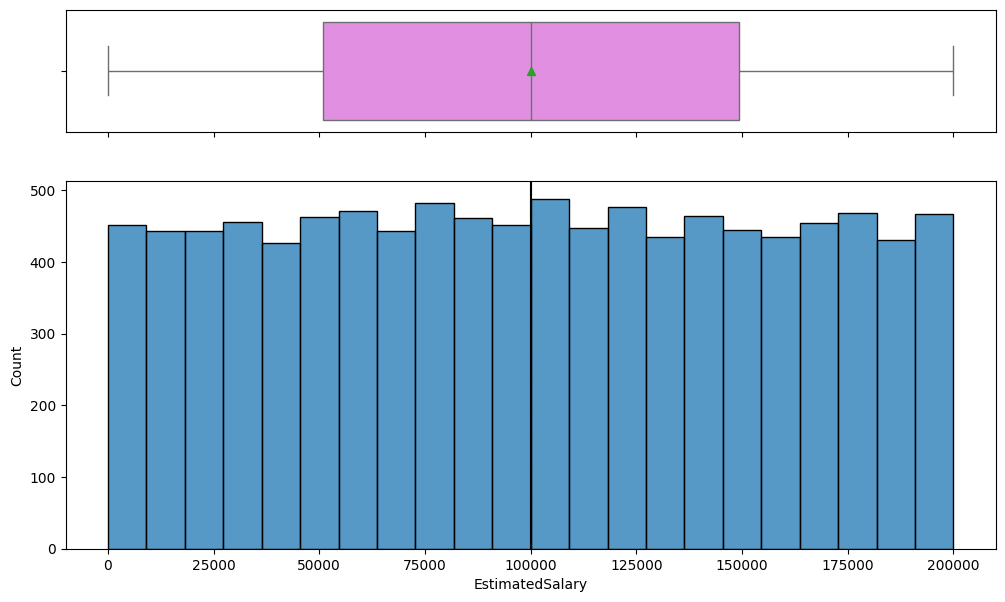

In [32]:
histogram_boxplot(bankchurn_df, "EstimatedSalary")

**Observations:**
* The data is spread evenly across the salary ranges and does not represent a normal distribution.
* Average salary is $100,090.00.

In [72]:
bankchurn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000,651,97,350,584,652,718,850
Age,10000,39,10,18,32,37,44,92
Tenure,10000,5,3,0,3,5,7,10
Balance,10000,76486,62397,0,0,97199,127644,250898
NumOfProducts,10000,2,1,1,1,1,2,4
HasCrCard,10000,1,0,0,0,1,1,1
IsActiveMember,10000,1,0,0,0,1,1,1
EstimatedSalary,10000,100090,57510,12,51002,100194,149388,199992
Exited,10000,0,0,0,0,0,0,1


#### Observations on Exited

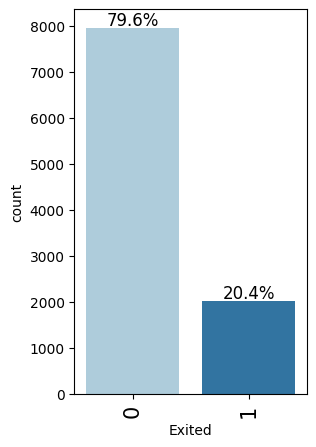

In [42]:
labeled_barplot(bankchurn_df, "Exited", perc=True)

**Observations:**
* Exited is the target variable.
* 80% of customers have not left the bank with 20% exiting.

#### Observations on Geography

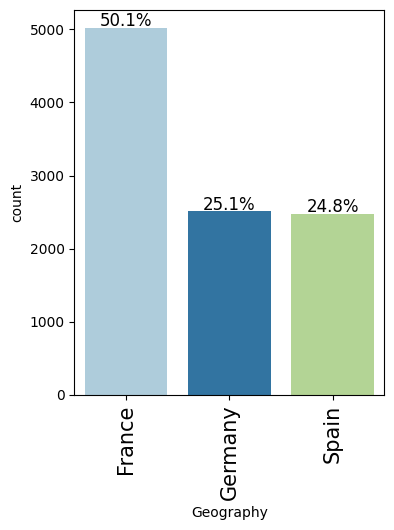

In [43]:
labeled_barplot(bankchurn_df, "Geography", perc=True)

**Observations:**
* France makes up the largest customer base with 50% followed by Germany and Spain even at 25%.

#### Observations on Gender

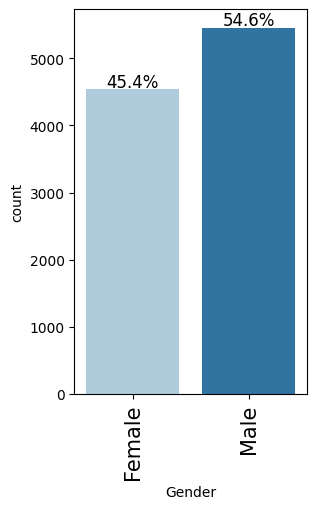

In [44]:
labeled_barplot(bankchurn_df, "Gender", perc=True)

**Observations:**
* 55% of customers are male and 45% are female.

#### Observations on Tenure

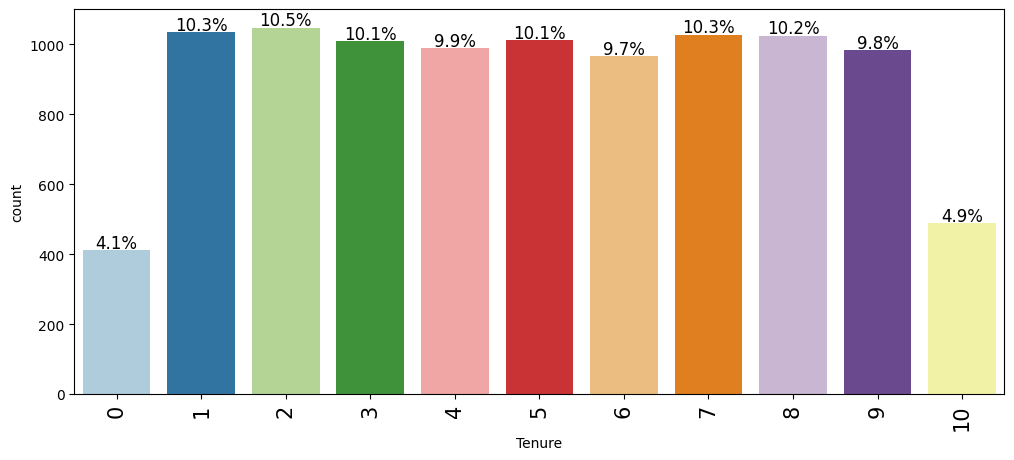

In [45]:
labeled_barplot(bankchurn_df, "Tenure", perc=True)


**Observations:**
* There are 4% of customers that have no tenure (0), most likely just joined the bank.
* 5% of customers have a tenure of 10 years.
* Tenure between 1 - 9 years makes up ~10% for each.

#### Observations on Number of Products

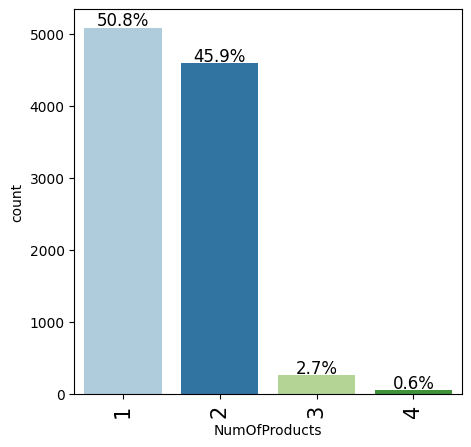

In [47]:
labeled_barplot(bankchurn_df, "NumOfProducts", perc=True)

**Observations:**
* 51% of customers use at least 1 product.
* Customer using 4 producst is <1%.
* 46% of customers use 2 products.
* 3% of customers have 3 products.

#### Observations on Has Credit Card

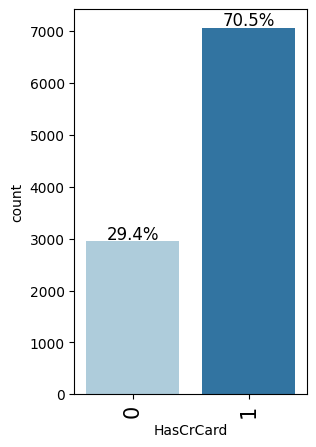

In [48]:
labeled_barplot(bankchurn_df, "HasCrCard", perc=True)

**Observations:**
* 71% of customers have a credit card.

#### Observations on Is Active Member

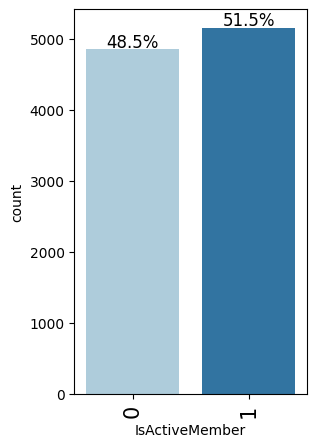

In [49]:
labeled_barplot(bankchurn_df, "IsActiveMember", perc=True)

**NOTE:** 

***There was no indication if 0 = Active Member or 1 = Not Active Member. I used the same 0 and 1 indicators that the Exited variable mapped.***

**Observations:**
* There are 51.5% active members and 48.5% non active members.

## Bivariate Analysis

In [102]:
# Get the numerical columns from the dataset.
numerical_columns = bankchurn_df.select_dtypes(include=['number']).columns.tolist()

# Print the list of numerical columns.
print("Numerical columns in the DataFrame are:")
print(numerical_columns)

Numerical columns in the DataFrame are:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


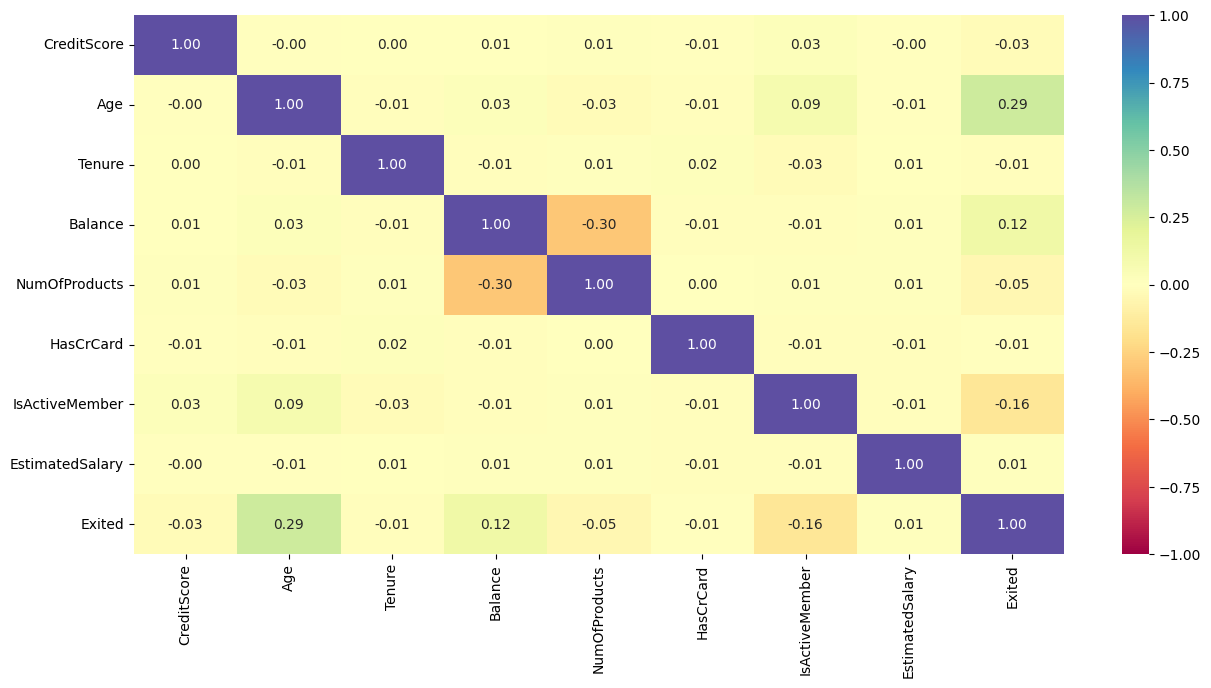

In [58]:
# Plot a heatmap to show the correlation between numerical columns.
plt.figure(figsize=(15, 7))
sns.heatmap(bankchurn_df[numerical_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**
* There is a positive correlation, 0.29, between customer age and if they exited the bank.
* There is a negative correlation, -0.30, between the number of products and customer balance.
* There is a negative correlation, -0.16, between active members and customers that exited.

#### Exited vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


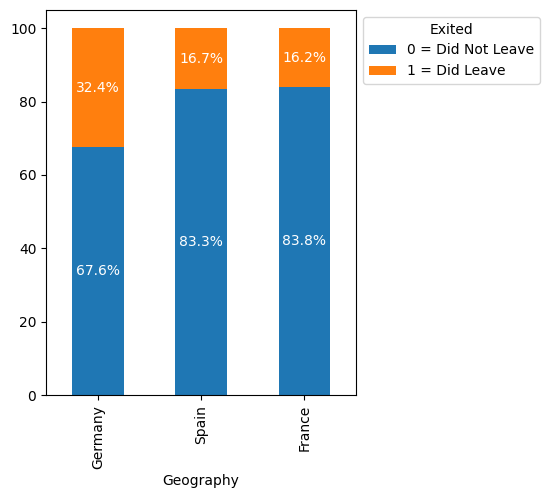

In [87]:
stacked_barplot(bankchurn_df, "Geography", "Exited" )

**Observations:**
* 32.4% of Germany customers exited the bank.
* 16% of customers left the bank from Spain and France.

#### Exited vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


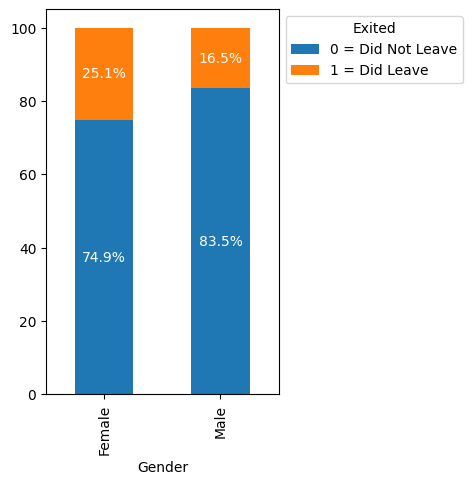

In [88]:
stacked_barplot(bankchurn_df, "Gender", "Exited" )

**Observations:**
* 25% of females have exited the bank.
* 17% of males have exited the bank.

#### Exited vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


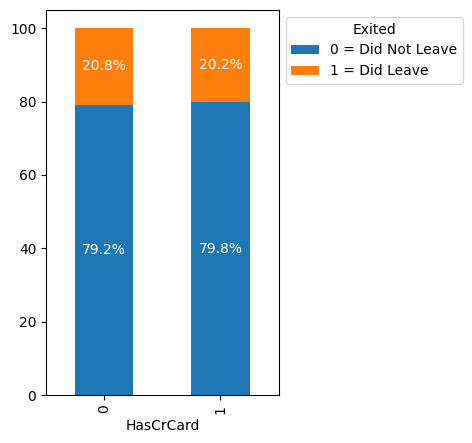

In [89]:
stacked_barplot(bankchurn_df, "HasCrCard", "Exited" )

**Observations:**
* Whether customers have or do not have a credit card has little bearing on exiting the bank.

#### Exited vs Is Active Member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


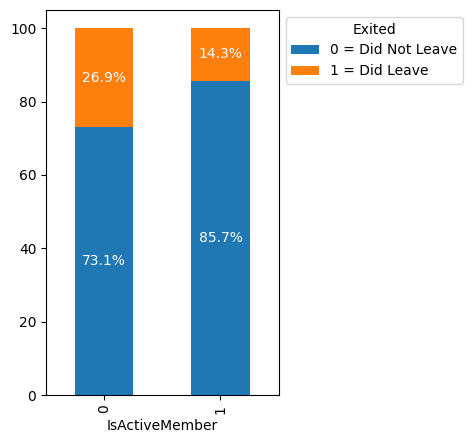

In [90]:
stacked_barplot(bankchurn_df, "IsActiveMember", "Exited" )

**Observations:**
* Customers that are not active members are more likely to exit the bank with 27%.
* 14% of active members exited the bank.

#### Exited vs Credit Score

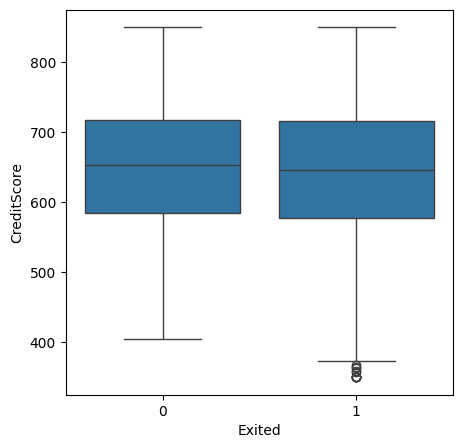

In [91]:
plt.figure(figsize=(5, 5))
sns.boxplot(y="CreditScore", x="Exited", data=bankchurn_df)
plt.show()

**Observations:**
* Credit score has little bearing on whether customers exit the bank.
* There are outliers for those that left the bank.

#### Exited vs Age

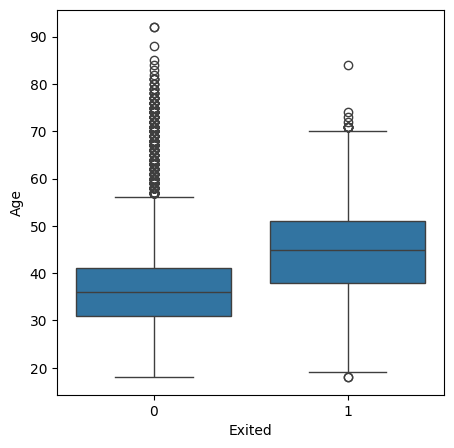

In [92]:
plt.figure(figsize=(5, 5))
sns.boxplot(y="Age", x="Exited", data=bankchurn_df)
plt.show()

**Observations:**
* Customers over the age of approximately >=57 are not likely to exit the bank.
* Customers with an average age of 45 are more likely to exit the bank.

#### Exited vs Tenure

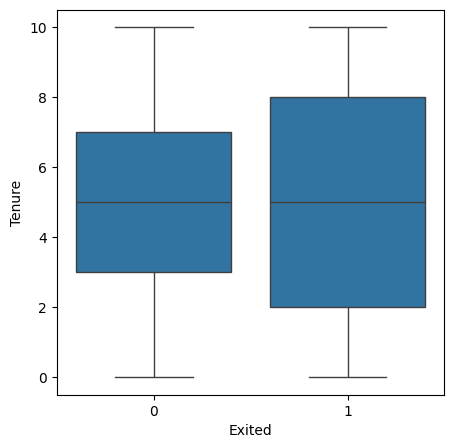

In [68]:
plt.figure(figsize=(5, 5))
sns.boxplot(y="Tenure", x="Exited", data=bankchurn_df)
plt.show()

**Observations:**
* Customers who stayed (0) and those who left (1) have a similar average tenure of around 5 years.
* The IQR for customers who stayed ranges ~3 - 7 years, while for those who left, it is slightly higher.
* Customers who stayed show a wider range of tenure, with whiskers extending from approximately 0 to 10 years, compared to those who left.

#### Exited vs Balance

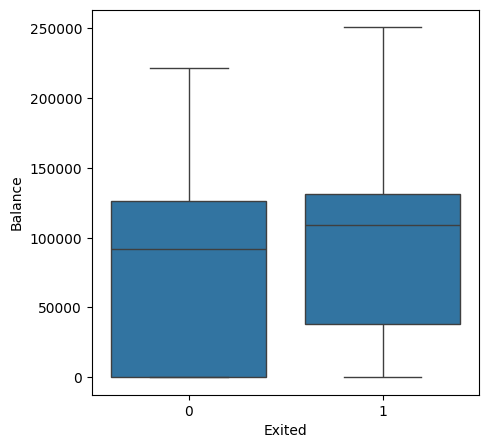

In [69]:
plt.figure(figsize=(5, 5))
sns.boxplot(y="Balance", x="Exited", data=bankchurn_df)
plt.show()

**Observations:**
* Customers who exited the bank have a average balance around $110,000.00. This is slightly higher than the average balance of those who did not exit.
* The IQR for customers who exited is smaller, ~$75,000.00 to $150,000.00 indicating less variability in their balances. For customers who did not exit, the IQR shows $45,000.00 to $130,000.00.
* Customers with a higher balance tend to exit the bank.

#### Exited vs Number of Products

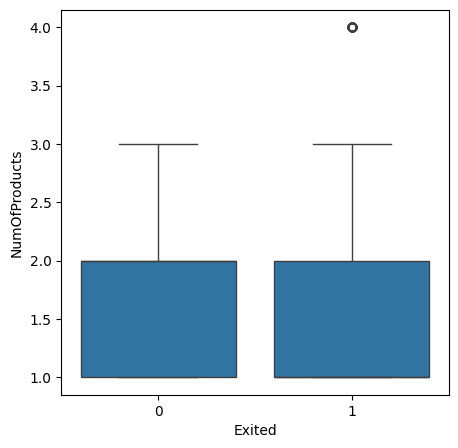

In [70]:
plt.figure(figsize=(5, 5))
sns.boxplot(y="NumOfProducts", x="Exited", data=bankchurn_df)
plt.show()

**Observations:**
* There is no difference between number of products and whether or not a customer exited the bank which have 1 or 2 products.
* Customers with 4 products (outliers) have left the bank.

#### Exited vs Estimated Salary

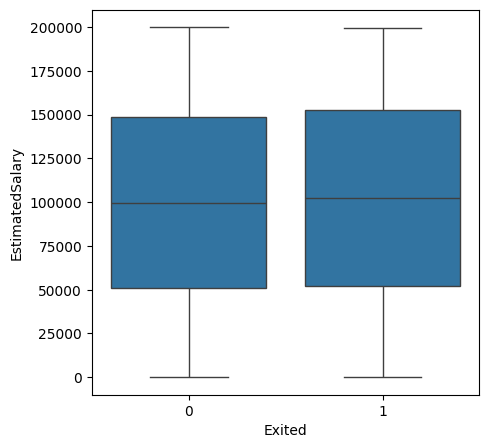

In [71]:
plt.figure(figsize=(5, 5))
sns.boxplot(y="EstimatedSalary", x="Exited", data=bankchurn_df)
plt.show()

**Observations:**
* The estimated salary of customers has little impact on whether they leave the bank or not.

---
---
# Data Pre-processing

### Dummy Variable Creation

In [97]:
# Check the shape of the dataset before dummy variable creation.
bankchurn_df.describe(include=["object"]).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [98]:
# Make copy of dataframe.
bankchurn_model_df = bankchurn_df.copy()

# Convert categorical columns to dummy variables.
ds = pd.get_dummies(
    bankchurn_model_df,
    columns=bankchurn_model_df.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True,dtype=float)

In [99]:
# Split the target variable and predictors.
X_data = bankchurn_model_df.drop(["Exited"], axis=1)

# Target variable.
y_data = bankchurn_model_df["Exited"]

In [100]:
# Create Dummy variables.
X_data = pd.get_dummies(X_data, columns=["Geography", "Gender"])
X_data.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
742,635,29,7,105406,1,1,1,149854,True,False,False,False,True
2029,520,33,4,156298,2,1,1,166103,True,False,False,False,True
3868,746,34,4,0,1,0,1,65167,True,False,False,True,False
9206,624,52,0,133723,1,0,0,4860,False,True,False,True,False
411,850,38,1,0,2,1,1,80007,True,False,False,False,True
2443,560,57,0,0,2,0,1,116782,True,False,False,False,True
6058,668,56,9,110994,1,1,0,134397,False,True,False,False,True
6001,775,30,5,0,1,1,0,193881,True,False,False,True,False
2818,669,37,4,0,1,1,0,132540,True,False,False,False,True
9512,663,45,5,83195,1,1,1,48682,True,False,False,False,True


In [101]:
# Check the shape of the dataset.
X_data.shape 

(10000, 13)

### Train-validation-test Split

In [103]:
# X axis credit score through estimated salary.
X = ds.drop(['Exited'],axis=1) 

# Y axis Exited.
y = ds['Exited']

In [104]:
# Splitting the dataset into the Training and Testing set.
X_large, X_test, y_large, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 42,
    stratify = y,
    shuffle = True
)

In [105]:
# Splitting the dataset into the Training and Testing set.
X_train, X_val, y_train, y_val = train_test_split(
    X_large, 
    y_large, 
    test_size = 0.2, 
    random_state = 42,
    stratify = y_large, 
    shuffle = True
) 

In [106]:
# Check shape of the X datasets.
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 11) (1600, 11) (2000, 11)


In [107]:
# Check shape of the y datasets.
print(y_train.shape, y_val.shape, y_test.shape)

(6400,) (1600,) (2000,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [109]:
# Defining the list of numerical columns
numerical_columns = ["CreditScore", 
             "Age", 
             "Tenure", 
             "Balance", 
             "EstimatedSalary"]

# Create a StandardScaler object.
scaler = StandardScaler()

# Standardizes the numerical features in the training, validation, and test 
# datasets using a scaler.
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [113]:
# List features in the StandardScaler object.
scaler.feature_names_in_.tolist()


['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

---
---
# Model Building

## Helper Functions

In [182]:
# Create a function for plotting the confusion matrix.
def make_confusion_matrix(cm, group_names, categories, cmap="Blues"):
    """
    This function will make a confusion matrix plot with labels and percentages.

    cm: confusion matrix
    group_names: list of strings that represent the labels (e.g., 'True Negative', 'False Positive', etc.)
    categories: list of strings that represent the categories (e.g., 'Not_Exited', 'Exited')
    cmap: color map for the heatmap
    """
    # Calculate percentages
    cm_sum = np.sum(cm)
    cm_perc = cm / cm_sum * 100

    # Create a string representation of the confusion matrix with labels and percentages
    labels = [f"{name}\n{value}\n{percentage:.2f}%" for name, value, percentage in zip(group_names, cm.flatten(), cm_perc.flatten())]
    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels, fmt="", cmap=cmap, xticklabels=categories, yticklabels=categories)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix")

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    # Add metrics to the plot
    plt.figtext(0.5, -0.15, f"Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}", 
                ha="center",
                fontsize=9, 
                bbox={"facecolor":"white", "alpha":0.5, "pad":7, "edgecolor":"none"})

    plt.show()

## Model evaluation criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

In the context of a neural network model with a sigmoid activation function used for predicting customer churn, the choice of the best metric depends on the business objectives and the consequences of different types of errors. Here is a step-by-step logic for choosing the best metric:

1. Understand Business Objectives:
* The primary goal is to accurately predict customer churn to take proactive measures to retain customers.
* False negatives (failing to identify a customer who will churn) might be more costly than false positives (incorrectly predicting a customer will churn).

2. Evaluate Key Metrics:
* Accuracy: Measures the overall correctness of the model. However, in the presence of class imbalance, accuracy might be misleading.
* Precision: Indicates the proportion of true positive predictions among all positive predictions. High precision means fewer false positives.
* Recall (Sensitivity): Indicates the proportion of true positive predictions among all actual positives. High recall means fewer false negatives.
* F1 Score: The harmonic mean of precision and recall. It balances the trade-off between precision and recall.
* Support: The number of actual occurrences of each class in the dataset.

3. Consider Class Imbalance:
* The dataset shows a significant class imbalance (1274 instances of class 0 vs. 326 instances of class 1).
* Metrics like precision, recall, and F1 score are more informative than accuracy in such scenarios.

4. Business Impact of Errors:
* False Negatives: Missing a customer who will churn can result in lost revenue and missed opportunities for retention strategies.
* False Positives: Incorrectly predicting churn might lead to unnecessary retention efforts and costs.

5. Choosing the Best Metric:
* Recall: Given the high cost of false negatives, recall is crucial as it measures the ability to identify actual churners.
* F1 Score: Balances precision and recall, providing a single metric that accounts for both false positives and false negatives.
* Precision: Important if the cost of false positives is also significant, but in this scenario, recall might be prioritized.

**Summary:**
Based on the results and the business scenario, the best metric for evaluating the neural network model with a sigmoid activation function for predicting customer churn would be Recall and F1 Score.
* Recall is critical because it ensures that most actual churners are identified, minimizing the risk of losing customers who might churn.
* F1 Score provides a balanced view by considering both precision and recall, making it a comprehensive metric for evaluating the model's performance in the presence of class imbalance.

By focusing on these metrics, the business can better identify customers at risk of churning and take appropriate retention actions, ultimately improving customer retention and reducing churn-related losses.

In [114]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [115]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [116]:
# Initializing the neural network.
model_0 = Sequential()
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_0.add(Dense(32, activation='relu'))
model_0.add(Dense(1, activation = 'sigmoid'))

In [183]:
# Yse SGD as the optimizer.

# NOTE RECOMMENDATION:
# WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.SGD` 
# runs slowly on M1/M2 Macs, please use the legacy Keras optimizer 
# instead, located at `tf.keras.optimizers.legacy.SGD`.
#optimizer = tf.keras.optimizers.legacy.SGD(0.001)

optimizer = tf.keras.optimizers.SGD(0.001)
metric = 'accuracy'

In [184]:
model_0.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=[metric,
    Recall(name='recall')]
)

In [185]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [186]:
# Fitting the ANN to the Training set.
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=50,
    verbose=1
)

Epoch 1/50
200/200 [==============================] - 0s 661us/step - loss: 0.4168 - accuracy: 0.8192 - recall: 0.2124 - val_loss: 0.4216 - val_accuracy: 0.8175 - val_recall: 0.2025
Epoch 2/50
200/200 [==============================] - 0s 367us/step - loss: 0.4166 - accuracy: 0.8194 - recall: 0.2117 - val_loss: 0.4215 - val_accuracy: 0.8188 - val_recall: 0.2086
Epoch 3/50
200/200 [==============================] - 0s 393us/step - loss: 0.4164 - accuracy: 0.8192 - recall: 0.2117 - val_loss: 0.4214 - val_accuracy: 0.8188 - val_recall: 0.2086
Epoch 4/50
200/200 [==============================] - 0s 382us/step - loss: 0.4163 - accuracy: 0.8195 - recall: 0.2117 - val_loss: 0.4214 - val_accuracy: 0.8188 - val_recall: 0.2086
Epoch 5/50
200/200 [==============================] - 0s 375us/step - loss: 0.4161 - accuracy: 0.8200 - recall: 0.2186 - val_loss: 0.4213 - val_accuracy: 0.8181 - val_recall: 0.2086
Epoch 6/50
200/200 [==============================] - 0s 369us/step - loss: 0.4160 - accur

#### Loss Function

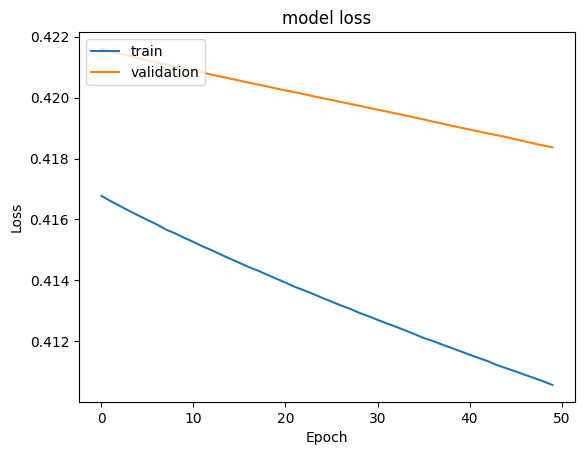

In [187]:
# Plotting Train Loss vs Validation Loss.
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Recall

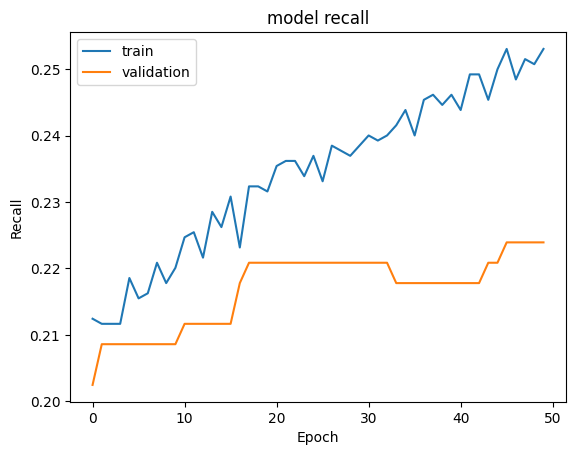

In [188]:
# Plotting Train recall vs Validation recall.
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [196]:
# Predicting the results using best as a threshold.
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

200/200 [==============================] - 0s 275us/step


In [197]:
# Predicting the results using best as a threshold.
y_val_pred = model_0.predict(X_val) 
y_val_pred = (y_val_pred > 0.5)

50/50 [==============================] - 0s 2ms/step


In [198]:
model_name = "NN with SGD"
train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

#### Classifiction Report

In [199]:
# Classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      5096
           1       0.69      0.25      0.37      1304

    accuracy                           0.82      6400
   macro avg       0.76      0.61      0.63      6400
weighted avg       0.81      0.82      0.79      6400



In [201]:
# Classification report.
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1274
           1       0.65      0.22      0.33       326

    accuracy                           0.82      1600
   macro avg       0.74      0.60      0.61      1600
weighted avg       0.79      0.82      0.78      1600



#### Confusion Matrix

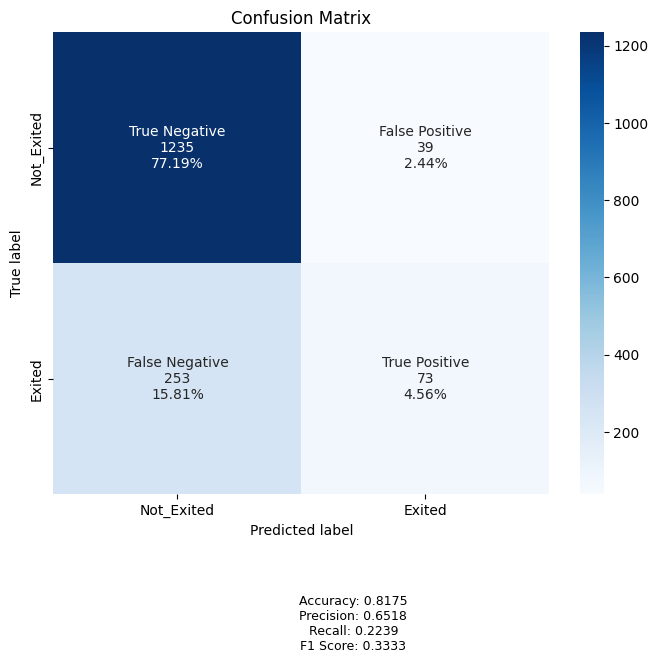

In [202]:
cm = confusion_matrix(y_val, y_val_pred)
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap="Blues")

**Observations:**

### Analysis of Classification Report:

#### Key Metrics:
1. **Precision**:
   - **Class 0**: 0.83
   - **Class 1**: 0.65
   - **Macro Avg**: 0.74
   - **Weighted Avg**: 0.79

2. **Recall**:
   - **Class 0**: 0.97
   - **Class 1**: 0.22
   - **Macro Avg**: 0.60
   - **Weighted Avg**: 0.82

3. **F1 Score**:
   - **Class 0**: 0.89
   - **Class 1**: 0.33
   - **Macro Avg**: 0.61
   - **Weighted Avg**: 0.78

4. **Support**:
   - **Class 0**: 1274
   - **Class 1**: 326

#### Conclusions:
1. **Overall Accuracy**:
   - The model has an overall accuracy of 0.82, meaning it correctly predicts 82% of the instances.

2. **Class 0 Performance**:
   - **Precision**: 0.83 indicates that 83% of the instances predicted as class 0 are actually class 0.
   - **Recall**: 0.97 indicates that 97% of the actual class 0 instances are correctly identified by the model.
   - **F1 Score**: 0.89 is high, indicating strong performance for class 0.

3. **Class 1 Performance**:
   - **Precision**: 0.65 indicates that 65% of the instances predicted as class 1 are actually class 1.
   - **Recall**: 0.22 indicates that only 22% of the actual class 1 instances are correctly identified by the model.
   - **F1 Score**: 0.33 is low, indicating poor performance for class 1.

4. **Class Imbalance**:
   - The support values show a significant class imbalance, with more instances of class 0 (1274) than class 1 (326). This imbalance likely affects the model's performance, particularly for class 1.

5. **Macro and Weighted Averages**:
   - **Macro Avg**: The macro average F1 score is 0.61, which is the unweighted average of the F1 scores for both classes. This indicates the model's performance across both classes without considering class imbalance.
   - **Weighted Avg**: The weighted average F1 score is 0.78, which takes into account the number of instances in each class. This is more representative of the model's overall performance given the class distribution.

#### Recommendations:
1. **Improve Class 1 Performance**:
   - Consider techniques such as oversampling the minority class (class 1), undersampling the majority class (class 0), or using class weights to improve the model's performance for class 1.

2. **Model Tuning**:
   - Experiment with different hyperparameters, optimizers, or architectures to see if the performance can be improved further.

3. **Evaluation Metrics**:
   - Continue to monitor precision, recall, and F1 score for both classes, especially if the class distribution changes.

### Summary:
The neural network model with a sigmoid activation function performs well overall, with an accuracy of 0.82. However, it performs significantly better for class 0 than for class 1, likely due to class imbalance. Improving the model's performance for class 1 should be a priority, possibly through data balancing techniques or model tuning.

## Model Performance Improvement

### Neural Network with Adam Optimizer

### Neural Network with Adam Optimizer and Dropout

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___